## MNIST Digit Classifier (2 -> 128 -> 64 -> 10)

Neural network in PyTorch to classify handwritten digits (0-9) from the MNIST dataset.

- load and explore MNIST dataset
- build a simple feedforward neural netowrk using nn.Module
- train and evaluate the model
- visualize predictions

Dataset: 28x28 grayscale images of digits (0-9)

Architecture:
- input layer: 784 units (flattened 28x28)
- hidden layers: 128 -> 64
- output layer: 10 units (one per digit)


## Import Libraries

In [1]:
import torch
import torch.nn as nn
# a module that provides functions for operations used in neural networks
# e.g. F.relu, F.cross_entropy, F.softmax
import torch.nn.functional as F
import torch.optim as optim

# a library that provides standard datasets like MNIST,
# common image transformations, and pretrained models
import torchvision
from torchvision import datasets, transforms

# a module that helps with data loading and batching
from torch.utils.data import DataLoader     

import matplotlib.pyplot as plt
import numpy as np

## Load the MNIST Dataset

In [2]:
# convert each image from a PIL image to a tensor
transform = transforms.ToTensor()

# 60000 training samples and 10000 test samples
train_data = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_data = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)

100.0%
100.0%
100.0%
100.0%


## Visualize Some Sample Images

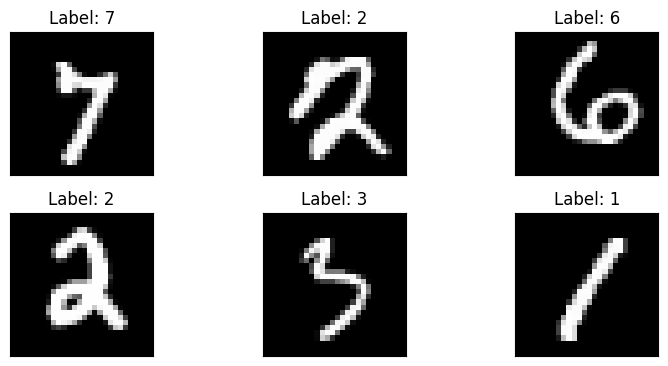

In [3]:
examples = enumerate(train_loader)
batch_idx, (example_data, example_targets) = next(examples)

fig = plt.figure(figsize=(8, 4))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.tight_layout()
    plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
    plt.title(f"Label: {example_targets[i].item()}")
    plt.xticks([])
    plt.yticks([])

## Define the Neural Network Architecture

In [4]:
class MNISTClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Flatten(),           # flatten 1x28x28 -> 784
            nn.Linear(784, 128),    # input layer -> hidden layer 1
            nn.ReLU(),
            nn.Linear(128, 64),     # hidden layer 1 -> hidden layer 2
            nn.ReLU(),
            nn.Linear(64, 10)       # hidden layer 2 -> output layer
        )

    def forward(self, x):
        return self.net(x)

model = MNISTClassifier()

# check parameters
# x in net.x refers to the index in nn.Sequential
for name, param in model.named_parameters():
    if param.requires_grad:
        print(name, param.shape)

net.1.weight torch.Size([128, 784])
net.1.bias torch.Size([128])
net.3.weight torch.Size([64, 128])
net.3.bias torch.Size([64])
net.5.weight torch.Size([10, 64])
net.5.bias torch.Size([10])


## Define the Loss Function and Optimizer
### Additional Notes
- binary cross-entropy loss is used for binary classification problems
- cross entropy loss is used for multi-class classification problems
    - log softmax: converts model outputs (logits) into log-probabilities
    - negative log-likelihood: penalizes low probability on the correct class

In [5]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

## Train the Model
### Additional Notes
- model.train(): enables training-specific behaviors
    - Dropout: randomly zeros out neurons
    - BatchNorm: computes running mean/variance from the batch

- for images, labels in train_loader
    - each iterations gives a mini-batch of:
        - images: a tensor of shape [batch_size=64, channels=1, height=28, width=28]
        - labels: a tensor of shape [batch_size=64]
            - correct class of each image (e.g. [4, 0, 1, ...])

In [6]:
epochs = 5

for epoch in range(epochs):
    # set to training mode
    model.train()
    total_loss = 0

    # loop over batches from DataLoader
    for images, labels in train_loader:
        # forward pass
        outputs = model(images)
        loss = loss_fn(outputs, labels)

        # backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
    
    avg_loss = total_loss / len(train_loader)
    print(f"Epoch {epoch+1}/{epochs}, Loss: {avg_loss:.4f}")

Epoch 1/5, Loss: 0.3475
Epoch 2/5, Loss: 0.1475
Epoch 3/5, Loss: 0.0989
Epoch 4/5, Loss: 0.0731
Epoch 5/5, Loss: 0.0575
